<h1>
<b>Quantum Computing and the Deutsch-Jorsza Algorithm</b>
</h1>



<h1>
Quantum theory / Quantum computing basics
</h1>

To understand the Deutscu-Jorsza Algorithm, you will first need to have some understanding of the basics of quantum computing and quantum theory. 
<b>Quantum theory explains the theory of the behaviour of matter and energy on the atomic and subatomic level.</b> <br>
The development of quantum theory was improved on a great deal over the 1900s, with input coming from great scientist such as Planck, Einstein, de Broglie and Heisenberg. One major interpretation that really helps to get a bit of a grasp of quantum theory is the Copenhagen Interpretation and the analogy of Schrodinger's Cat. <br>

The Copenhagen Interpretation was proposed by Niels Bohr which states that a particle is whatever its is measured to be(such as a wave or particle), but it cannot be assumed to have specific properties or if it even exists, until it is measured.<br>
![Alt text](Pictures/schrodingers_cat.png) <br>
A great way to wrap your head around this theory is the somewhat cruel analogy of <b>Schrodinger's Cat</b>. 
Imagine you have a living cat and harshly put it into a lead box. At this point you know that the cat is still alive as you have just put the cat in. Then imagine you put a vial of poison or cyanide into the box. At this point you cannot be certain if the cat is now alive or dead. Since you are uncertain, the cat is technically in a state of being both alive and dead. This is known as <b>superposition</b>, which you will hear us speak about again. The cat is technically in this state of superposition until someone finally opens the box to observe the cat to see it's fate. This scenario is basically the basis behing quantum physics.


Quantum computing is then, an area of computer science that utilizes the principles of quantum theory. Quantum computing uses subatomic particles such as electrons and photons as the building blocks for it's information processing. Specifically, quantum computing uses these particles to represent and manipulate information in the form of quantum bits, or qubits which we will talk about later. <br>
It was discovered that quantum algorithms can be more effective than classical algorithms in solving specific computational problems. Quantum computing has the potential to examine vast numbers of possibilities and identify potential solutions to intricate problems and obstacles.



In [ ]:
%pip install qiskit

<h1>
Qubits
</h1>

**Introduction to Qubits**
In classical computing, information is represented using bits that can take on the values of 0 or 1. However, in quantum computing, we use qubits to represent information. A qubit can also take on the values of 0 or 1, but it can also exist in a superposition of both states.

Superposition is a unique quantum mechanical concept, which means that a qubit can exist in a state that is a combination of both 0 and 1. Moreover, qubits can also become entangled, meaning that the state of one qubit can be dependent on the state of another qubit.

![Qubit diagram](Pictures/Qubit_Diagram.png)

Entanglement is a powerful property that allows us to perform certain calculations exponentially faster than classical computers. In the following section, we will dive deeper into the properties and behavior of qubits, as well as explore how to manipulate them using quantum gates in a later section.

**Qubit superpositions**

One of the most interesting properties of qubits is that they can exist in a superposition of states. In other words, a qubit can be in multiple states at the same time.We can create a qubit in superposition using the qiskit library.

In [2]:
import qiskit
print(qiskit.__version__)

0.23.2


In [5]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector

# Create a quantum circuit with one qubit
circuit = QuantumCircuit(1, 1)

# Apply a Hadamard gate to the qubit to put it in superposition
circuit.h(0)

# Measure the qubit and store the result in the classical bit
circuit.measure(0, 0)

# Simulate the circuit using the Aer simulator
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, simulator).result()

# Print the measurement result
print(result.get_counts(circuit))

# Draw the circuit
circuit.draw()

{'1': 518, '0': 506}


┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

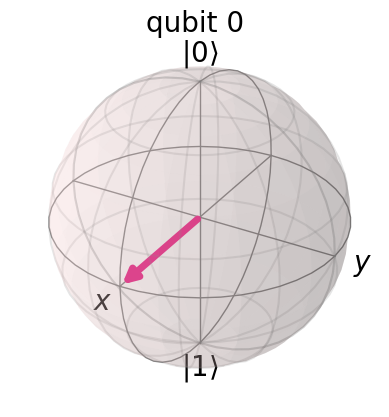

In [6]:
statevector_simulator = Aer.get_backend('statevector_simulator')
statevector = execute(circuit.remove_final_measurements(inplace=False), statevector_simulator).result().get_statevector()
plot_bloch_multivector(statevector)

This code creates a single qubit in a superposition state, which is a foundation for many different quantum algorithms and gates. The Bloch sphere representation helps visualize the qubit's state as a point on the surface of a sphere.

<h1>
Quantum Gates
</h1>

Quantum gates are the fundamental building blocks of quantum circuits that allow manipulation of qubits' states. In this section, we will focus on two important quantum gates: the Hadamard gate and the CNOT gate.

Hadamard Gate

The Hadamard gate is a single-qubit gate that puts a qubit into a superposition state, creating an equal probability of measuring either 0 or 1.This is what was shown in the previous section covering Qubits. Mathematically, the Hadamard gate is represented by the following matrix:

H = (1/sqrt(2)) * | 1 1 |
                  | 1 -1|

Applying the Hadamard gate to a qubit in the state |0⟩ or |1⟩ will result in a superposition state:

H |0⟩ = (1/sqrt(2))(|0⟩ + |1⟩)
H |1⟩ = (1/sqrt(2))(|0⟩ - |1⟩)

Here's a code example using the Hadamard gate with the qiskit library:

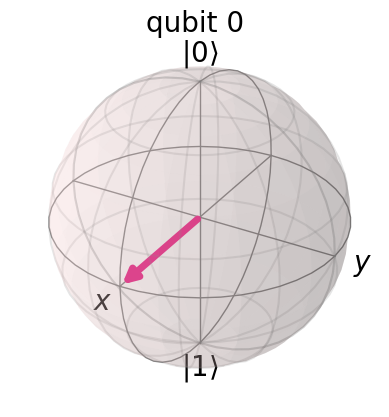

In [7]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# Create a quantum circuit with one qubit
circuit = QuantumCircuit(1)

# Apply a Hadamard gate to the qubit
circuit.h(0)

# Visualize the circuit
circuit.draw()

# Simulate the circuit and visualize the resulting state on a Bloch sphere
simulator = Aer.get_backend('statevector_simulator')
statevector = execute(circuit, simulator).result().get_statevector()
plot_bloch_multivector(statevector)


**CNOT Gate**

The CNOT gate is a two-qubit gate that performs an XOR operation on the target qubit if the control qubit is in state |1⟩. The CNOT gate is essential for creating entanglement between qubits. The matrix representation of the CNOT gate is:

CNOT = | 1 0 0 0 |
       | 0 1 0 0 |
       | 0 0 0 1 |
       | 0 0 1 0 |

Here's a code example demonstrating the CNOT gate using the qiskit library:

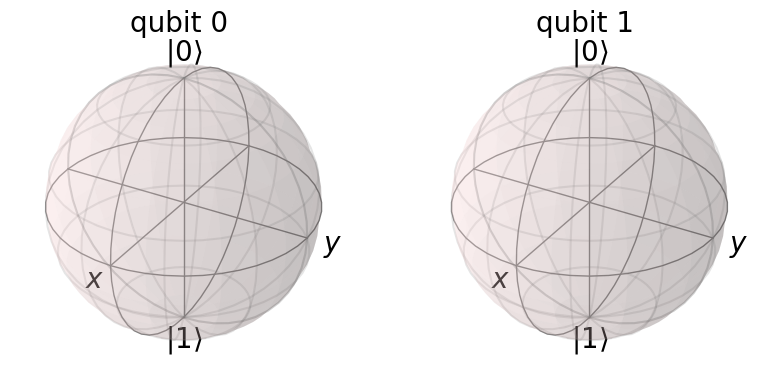

In [8]:
# Create a quantum circuit with two qubits
circuit = QuantumCircuit(2)

# Apply a Hadamard gate to the first qubit (control qubit)
circuit.h(0)

# Apply a CNOT gate with the first qubit as control and the second qubit as target
circuit.cx(0, 1)

# Visualize the circuit
circuit.draw()

# Simulate the circuit and visualize the resulting state on a Bloch sphere
statevector = execute(circuit, simulator).result().get_statevector()
plot_bloch_multivector(statevector)


In this example, we first create a superposition state using the Hadamard gate and then use the CNOT gate to entangle the two qubits. The resulting state is a Bell state, which is a maximally entangled state.

<h1>
Quantum Circuits
</h1>

<h1>

Deutsch-Josza Algorithm

</h1>

The first quantum algorithm to outperform the best classical algorithm was the Deustch-Jozsa algorithm. This algorithm demonstrated that quantum computers can provide certain advantages as computational tools for particular problems. <br>
The problem we are facing here is to determine whether a boolean function is constant or balanced. A function is constant if it returns the same value for all of the inputs, a function is balanced if it returns half of the inputs as 0 and half as 1. <br>
The classical solution requires evaluating the function for n inputs to determine whether it is constant or balanced. This takes O(2^(n-1)) time where n is equal to the size of the input. <br>
The quantum solution uses the Deustch-Jozsa algorithm, which can solve the problem with just one function evaluation, this takes O(n^2) time.<br><br>
It may help to understand the differeneces between the time complexities between these two algorithms. <br>The classical solution, which takes O(2^(n-1)) time, this is known as <b>exponential time</b>. This type of time complexity is known to be very slow and inefficient. This is because for every extra input that the algorithm takes, the time to complete the algorithm doubles from the previous amount of time. In a practical setting, it simply does not make sense to use this type of algorithm unless completely necessary, especially if there are a large amount of inputs.<br>
However, in the quantum solution, it takes O(n^2) time. This is known as <b>polynomial time</b>. Polynomial time is a much faster and more efficient time complexity than exponential time and the time it takes grows at a much slower rate. For this type of time complexity, as the input size doubles, the amount of quantum gates required to implement the algorithm increases by a factor of 4. This makes polynomial time magnitudes of times faster than exponential time. <br>
I will give you a quick example to explain the difference of magnitude between the two time complexities.
Lets consider the size of the input is n = 20. The polynomial time algorithm would take only 400 units of time (20^2), whereas the exponential time algorithm would take over one million units of time (2^20). As you can see, the two time complexities are miles away from eachother in regards to efficiency. 

<br>
Here is an implementation of this algorithm using Python:


In [17]:
from qiskit import *
import numpy as np

def constant_or_balanced(f):
    # Define the quantum circuit
    n = len(f)
    qubits = QuantumRegister(n + 1)
    bits = ClassicalRegister(n)
    circuit = QuantumCircuit(qubits, bits)

    # Initialize the qubits
    circuit.x(qubits[n])

    circuit.barrier()

    # Apply Hadamard gates to the first n qubits
    for i in range(n):
        circuit.h(qubits[i])

    circuit.barrier()

    # Apply the function f to the qubits
    for i in range(n):
        if f[i] == 1:
            circuit.cx(qubits[i], qubits[n])

    circuit.barrier()

    # Apply Hadamard gates to the first n qubits
    for i in range(n):
        circuit.h(qubits[i])

    circuit.barrier()

    # Measure the first n qubits
    for i in range(n):
        circuit.measure(qubits[i], bits[i])

    # Simulate the circuit
    backend = Aer.get_backend('qasm_simulator')
    counts = execute(circuit, backend, shots=1).result().get_counts()

    # Determine if the function is constant or balanced
    if len(counts) == 1:
        return "constant"
    else:
        return "balanced"

# Test the function
f = [1, 0, 1, 0, 0]
result = constant_or_balanced(f)
print("The function is", result)


The function is constant


<h1>
Implementation of the Deutsch-Josza Algorithm
</h1>

<h1>
Quantum Limitations
</h1>

In [2]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector

# Create a quantum circuit with one qubit
circuit = QuantumCircuit(1, 1)

# Apply a Hadamard gate to the qubit to put it in superposition
circuit.h(0)

# Measure the qubit and store the result in the classical bit
circuit.measure(0, 0)

# Simulate the circuit using the Aer simulator
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, simulator).result()

# Print the measurement result
print(result.get_counts(circuit))

# Draw the circuit
circuit.draw()

{'1': 497, '0': 527}


┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

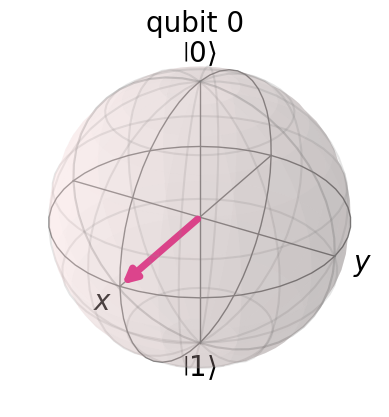

In [4]:
statevector_simulator = Aer.get_backend('statevector_simulator')
statevector = execute(circuit.remove_final_measurements(inplace=False), statevector_simulator).result().get_statevector()
plot_bloch_multivector(statevector)


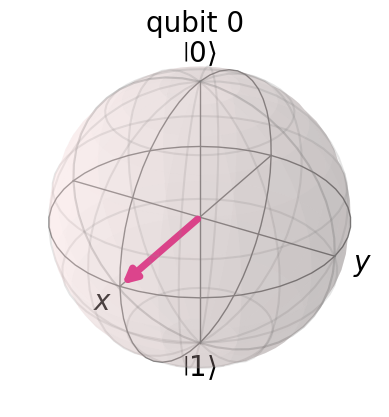

In [3]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# Create a quantum circuit with one qubit
circuit = QuantumCircuit(1)

# Apply a Hadamard gate to the qubit
circuit.h(0)

# Visualize the circuit
circuit.draw()

# Simulate the circuit and visualize the resulting state on a Bloch sphere
simulator = Aer.get_backend('statevector_simulator')
statevector1 = execute(circuit, simulator).result().get_statevector()
plot_bloch_multivector(statevector1)